# Laboratorio 8: Missing Data and Feature Engineering
## Luis Pedro Zenteno |  20190516
### 21/11/2021

## Parte 1

Para poder realizar el reporte detallado de missing data, se procederá a descargar el dataset,
y también se hará una inspección de las variables de forma general para entender más los datos. 

In [705]:
import numpy as np
import pandas as pd
titanicMD = pd.read_csv("titanic_MD.csv")

In [706]:
print('titanicMD dataset shape:', titanicMD.shape)
df=titanicMD
titanicMD.head(10)


titanicMD dataset shape: (183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S
6,24,1,1,"Sloper, Mr. William Thompson",?,NaN,0.0,0.0,113788,35.5000,A6,S
7,28,0,1,"Fortune, Mr. Charles Alexander",?,19.0,3.0,2.0,19950,263.0000,C23 C25 C27,S
8,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,NaN,PC 17572,76.7292,D33,C
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.9792,B30,C


In [707]:
df.describe() #Muestra descripcción de variables numéricas. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Se puede observar que el dataset cuenta con 12 variables y 183 registros. Además, incluye un total de 6 
variables categóricas (Survived,Pclass,Sex,Ticket,Cabin y Embarked). El resto de las variables son continuas. 

### 1.	Reporte detallado de missing data para todas las columnas

A primera vista, se puede observar  en el outpur del chunk 9 que existen variables como Age, Parch, SibSp y Fare que tienen campos en blanco. Sin embargo, este análisis solo se hizo para variables numéricas. Además, en el output del chunk 7 dónde se muestra el dataset,también se pueden observar muchos campos con "NaN" y "?". Estos resultados demuestran que se tendrá con más detenimiento en las variables que no son numéricas, y analizar además de campos en blanco, datos con "NaN"  y "?".

In [708]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

En este punto, se puede observar que Age, SibSp, Parch, Fare y Embarked contienen valores con NaN. Sin embargo, ya se pudo encontrar que variables como Sex contienen valores como "?" para representar missing data. Debido a esto, se hará un filtro para analizar cuáles contienen este símbolo o alguno otro para representar NaN's. 

In [709]:
np.unique(df['Sex'])

array(['?', 'female', 'male'], dtype=object)

Como se mencionó anteriormente, la variable Sex incluye signo de interrogación para
identificar missing data en las edades. Este signo será cambiado más adelante para finalizar el análsis. 

In [710]:
np.unique(df['Age'])


array([ 0.92,  2.  ,  3.  ,  4.  ,  6.  , 11.  , 14.  , 15.  , 16.  ,
       17.  , 18.  , 19.  , 21.  , 22.  , 23.  , 24.  , 25.  , 27.  ,
       28.  , 29.  , 30.  , 31.  , 32.  , 33.  , 34.  , 35.  , 36.  ,
       36.5 , 37.  , 38.  , 39.  , 40.  , 41.  , 42.  , 43.  , 44.  ,
       45.  , 46.  , 47.  , 48.  , 49.  , 50.  , 51.  , 52.  , 53.  ,
       54.  , 55.  , 56.  , 58.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 70.  , 71.  , 80.  ,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])

Se puede identificar los 25 valores de NaN, y también algunos datos como el 0,92 y 3l 36.5 que no hacen sentido en su totalidad. Estos números se cambiarán más adelante a números enteros para tener data más consistente. 

In [711]:
embarked_modificada=df['Embarked'].fillna("nan")
np.unique(embarked_modificada)

array(['C', 'Q', 'S', 'nan'], dtype=object)

Para embarked se encontró que es una variable categórica con valores faltantes, pero se debía confirmar que no tenía otros símbolos para tomar en cuenta. Sin embargo, se descubrió que no existía otra nomenclatura.

In [712]:
np.unique(df['Cabin'])

array(['A10', 'A16', 'A20', 'A23', 'A24', 'A26', 'A31', 'A34', 'A36',
       'A5', 'A6', 'A7', 'B101', 'B18', 'B19', 'B20', 'B22', 'B3', 'B30',
       'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50',
       'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73',
       'B77', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101',
       'C103', 'C104', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32',
       'C45', 'C46', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68',
       'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90',
       'C91', 'C92', 'C93', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17',
       'D19', 'D20', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37',
       'D46', 'D47', 'D48', 'D49', 'D50', 'D56', 'D6', 'D7', 'D9', 'E10',
       'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E31', 'E33', 'E34',
       'E36', 'E38', 'E40', 'E44', 'E46', 'E49', 'E50', 'E58', 'E

Para Cabin se puede observar que no existe otra nomenclatura para missing data, y tampoco hay incostencias. Lo que si ocurre es que no siempre se nombra de la misma manera a las cabinas. Sin embargo, por la diversidad de clases y tomando en cuenta que la "T" hace referencia a la tripulación, se concluye que no es relevante para el análisis.

In [713]:
np.unique(df['SibSp'])

array([ 0.,  1.,  2.,  3., nan, nan, nan])

In [714]:
np.unique(df['Parch'])

array([ 0.,  1.,  2.,  4., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

In [715]:
np.unique(df['Fare'])

array([  0.    ,   5.    ,   7.65  ,   8.05  ,  10.4625,  10.5   ,
        12.475 ,  12.875 ,  13.    ,  13.7917,  16.7   ,  25.5875,
        25.9292,  26.    ,  26.2833,  26.2875,  26.3875,  26.55  ,
        27.7208,  27.75  ,  28.5   ,  28.7125,  29.7   ,  30.    ,
        30.5   ,  30.6958,  31.    ,  32.3208,  33.5   ,  34.0208,
        34.6542,  35.5   ,  38.5   ,  39.    ,  39.4   ,  39.6   ,
        40.125 ,  49.5   ,  49.5042,  50.4958,  51.4792,  51.8625,
        52.    ,  52.5542,  53.1   ,  55.    ,  55.4417,  55.9   ,
        56.9292,  57.    ,  57.9792,  61.175 ,  61.9792,  63.3583,
        66.6   ,  69.3   ,  71.    ,  71.2833,  75.25  ,  76.7292,
        77.2875,  77.9583,  78.2667,  78.85  ,  79.2   ,  79.65  ,
        81.8583,  83.1583,  83.475 ,  86.5   ,  89.1042,  90.    ,
        91.0792,  93.5   , 106.425 , 108.9   , 110.8833, 113.275 ,
       120.    , 134.5   , 135.6333, 146.5208, 151.55  , 153.4625,
       164.8667, 211.3375, 211.5   , 227.525 , 247.5208, 262.3

Se pudo identificar los NaN para las variables de SibSp,Parch y Fare,confirmando las cantidades y que además, que no se utilizaran signos diferentes para nombrar misssing data.

Para la columna de Fare, cabe mencionar que se considera que la tarifa de 0 no es un dato faltante, sino es una tarifa de cortesia posiblemente aplicada a tripulación o invitados especiales al Titanic. 

Modificación de Sex y Age:

In [716]:
df.replace(r'\?', np.nan, regex = True, inplace = True)
df['Age'].replace(0.92, 92, inplace = True)
df['Age'].replace(36.5, 37, inplace = True)

In [717]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

Para todas aquellas variables que no se muestra el np.unique, es porque no se encontraron datos faltantes o incosistencias relevantes para mostrarse. 

En conclusión, se pudo identificar que las siguientes varialbes no tenían incosistencias o datos faltantes en el dataset: 
 
 * PassengerId
 * Survived
 * Pclass
 * Name
 * Ticket
 * Cabin
 
Por otro lado, se encontró missing data en las siguientes variables: 

 * Sex (51)
 * Age (25)
 * SibSp (3)
 * Parch (12)
 * Fare (8)
 * Embarked (12)

### 2.	Para cada columna especificar qué tipo de modelo se utilizará (solo el nombre y el porqué) y qué valores se le darán a todos los missing values. (Ej. Imputación sectorizada por la moda, bins, y cualquier otro método visto anteriormente). 

No se tomarán en cuenta los métodos de Deletion (Pairwise y Listwise) porque se prefiere mantener la mayor cantidad de registros y columnas posibles.

* **Sex: Filling Values**, ya que se puede identificar el sexo haciendo un ifelse en el nombre para identificar si contiene las palabras "Mr", "Mrs", "Miss", etc, y así poder darle un fill al sexo con este método. 
* **Age: Regresión Lineal Simple**, ya que podría relacionarlo con la tarifa asumiendo que la tarifa cambia dependiendo de la edad de las personas. EN este caso, sería mejor que la imputación por la media porque seguro tomaría en cuenta a niños pequeños y adultos muy grandes también. 
* **SibSp: Imputación por la media**, Considero que es una opción ya que no se puede hacer una generalización de la mayoría del barco, por lo que no se puede hacer imputación por la moda. En el caso del titanic se sabe que habían familias de diferentes miembros ejecutivos y parejas. Por lo tanto, la media podría acercarse más a la realidad.
* **Parch: Imputación por la media**, De igual manera que en SibSp considero que no se puede hacer una generalización de la mayoría del barco, por lo que no se puede hacer imputación por la moda. En el caso del titanic se sabe que habían familias de diferentes miembros ejecutivos y parejas. Por lo tanto, la media podría acercarse más a la realidad. 
* **Fare: Regresión Lineal Simple**, ya que se puede hacer una categorización de perfiles con la variable de Age para poder predecir Fare, asumiento que estan correlacionadas de manera significativa en la asignación de precios. 
* **Embarked: Regresion  Logística**, ya que al ser una variable categórica y no existe opción de hacer un ifelse con filling values, esta puede ser una opción, donde la regresión tratará de identificar la probabilidad de pertenencia a algun grupo en específico dentro de las opciones disponibles de la variable. 


 ### 3.Reporte de qué filas están completas 

Basado en el análisis del inciso 1 ya se pudo identificar las variables que incluye filas completas. Sin embargo, más evidencia será presentada en esta sección. 

In [718]:
np.unique(df['PassengerId'])


array([  2,   4,   7,  11,  12,  22,  24,  28,  53,  55,  63,  67,  76,
        89,  93,  97,  98, 103, 111, 119, 124, 125, 137, 138, 140, 149,
       152, 171, 175, 178, 184, 194, 195, 196, 206, 210, 216, 219, 225,
       231, 246, 249, 252, 253, 258, 263, 264, 269, 270, 274, 276, 292,
       293, 298, 300, 306, 308, 310, 311, 312, 319, 320, 326, 328, 330,
       332, 333, 337, 338, 340, 341, 342, 346, 357, 367, 370, 371, 378,
       391, 394, 395, 413, 430, 431, 435, 436, 439, 446, 450, 453, 454,
       457, 461, 463, 474, 485, 487, 488, 493, 497, 499, 505, 506, 513,
       516, 517, 521, 524, 537, 540, 541, 545, 551, 557, 559, 572, 573,
       578, 582, 584, 586, 588, 592, 600, 610, 619, 622, 626, 628, 631,
       633, 642, 646, 648, 660, 663, 672, 680, 682, 690, 691, 699, 700,
       701, 702, 708, 711, 713, 716, 717, 718, 725, 731, 738, 742, 743,
       746, 749, 752, 760, 764, 766, 773, 780, 782, 783, 790, 797, 803,
       807, 810, 821, 824, 836, 854, 858, 863, 868, 872, 873, 88

In [719]:
np.unique(df['PassengerId']).shape

(183,)

PassengerId tiene 183 datos unicos, por lo que se evidencia que tiene sus filas completas. 

In [720]:
np.unique(df['Survived'])

array([0, 1])

In [721]:
df['Survived'].count()

183

La variable categorica de Survided tiene dos tipos de entrada (1,0) y se puede observar que tiene 183 filas. 

In [722]:
np.unique(df['Pclass'])

array([1, 2, 3])

In [723]:
df['Pclass'].count()

183

La variable categorica de Pclass tiene tres tipos de entrada (1,2,3) y se puede observar que tiene 183 filas. 

In [724]:
df['Name'].count()

183

In [725]:
df['Ticket'].count()

183

In [726]:
df['Cabin'].count()

183

Para las variables de texto como lo son Name, Ticket y Cabin se muestra unicamente el count, debido a la extensión del contenido de cada variable. Sin embargo, se puede confirmar que no tienen nomenclatura extraña e inlcuyen sus 183 filas completas como se puede observar. 

En conclusión, las filas completadas son las siguientes: 

 * PassengerId
 * Survived
 * Pclass
 * Name
 * Ticket
 * Cabin
    

### 4.Utilizar los siguientes métodos para cada columna que contiene missing values:

#### a. Imputación general (media, moda y mediana)

##### Sex: Se hace imputación por la moda por ser una variable categórica. 

In [727]:
from sklearn.impute import SimpleImputer
df['Sex_IG'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['Sex']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female


#####  Age: Se hace imputación por la media, es una variable numérica. Sin embargo, también se puede hacer por mediana y moda.

In [728]:
df['Age_IG_media'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Age']])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG,Age_IG_media
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.272152
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000


In [729]:
df['Age_IG_mediana'] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG,Age_IG_media,Age_IG_mediana
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.272152,36.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0


In [730]:
df['Age_IG_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG,Age_IG_media,Age_IG_mediana,Age_IG_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.272152,36.0,24.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0


##### SibSp: Al ser una variable numerica ,  se puede hacer imputación por media, mediana y moda.

In [731]:
df['SibSp_IG_media'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['SibSp']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG,Age_IG_media,Age_IG_mediana,Age_IG_moda,SibSp_IG_media
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.000000
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.000000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.000000
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.272152,36.0,24.0,1.000000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.461111


In [732]:
df['SibSp_IG_mediana'] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[['SibSp']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG,Age_IG_media,Age_IG_mediana,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.000000,1.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.000000,1.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.000000,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.272152,36.0,24.0,1.000000,1.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.461111,0.0


In [733]:
df['SibSp_IG_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['SibSp']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG,Age_IG_media,Age_IG_mediana,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.000000,1.0,1.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.000000,1.0,1.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.000000,0.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.272152,36.0,24.0,1.000000,1.0,1.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.461111,0.0,0.0


##### Parch: al ser una variable numérica  se podrá hacer imputación por la media, mediana y moda. 

In [734]:
df['Parch_IG_media'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Parch']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_IG,Age_IG_media,Age_IG_mediana,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.000000,1.0,1.0,0.000000
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.000000,1.0,1.0,0.000000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.000000,0.0,0.0,0.000000
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.272152,36.0,24.0,1.000000,1.0,1.0,0.461988
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.461111,0.0,0.0,0.000000


In [735]:
df['Parch_IG_mediana'] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[['Parch']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_IG,Age_IG_media,Age_IG_mediana,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,C,male,38.000000,38.0,38.0,1.000000,1.0,1.0,0.000000,0.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,S,female,35.000000,35.0,35.0,1.000000,1.0,1.0,0.000000,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,S,male,54.000000,54.0,54.0,0.000000,0.0,0.0,0.000000,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,S,female,36.272152,36.0,24.0,1.000000,1.0,1.0,0.461988,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,S,female,58.000000,58.0,58.0,0.461111,0.0,0.0,0.000000,0.0


In [736]:
df['Parch_IG_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['Parch']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_IG,Age_IG_media,Age_IG_mediana,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,male,38.000000,38.0,38.0,1.000000,1.0,1.0,0.000000,0.0,0.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,female,35.000000,35.0,35.0,1.000000,1.0,1.0,0.000000,0.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,male,54.000000,54.0,54.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,female,36.272152,36.0,24.0,1.000000,1.0,1.0,0.461988,0.0,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,female,58.000000,58.0,58.0,0.461111,0.0,0.0,0.000000,0.0,0.0


##### Fare: Variable numérica a la que se le puede hacer imputuación por media, mediana y moda.

In [737]:
df['Fare_IG_media'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Fare']])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_IG_media,Age_IG_mediana,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,38.000000,38.0,38.0,1.000000,1.0,1.0,0.000000,0.0,0.0,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,35.000000,35.0,35.0,1.000000,1.0,1.0,0.000000,0.0,0.0,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,54.000000,54.0,54.0,0.000000,0.0,0.0,0.000000,0.0,0.0,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,36.272152,36.0,24.0,1.000000,1.0,1.0,0.461988,0.0,0.0,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,58.000000,58.0,58.0,0.461111,0.0,0.0,0.000000,0.0,0.0,26.5500


In [738]:
df['Fare_IG_mediana'] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[['Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_IG_mediana,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,38.0,38.0,1.000000,1.0,1.0,0.000000,0.0,0.0,71.2833,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,35.0,35.0,1.000000,1.0,1.0,0.000000,0.0,0.0,53.1000,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,54.0,54.0,0.000000,0.0,0.0,0.000000,0.0,0.0,51.8625,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,36.0,24.0,1.000000,1.0,1.0,0.461988,0.0,0.0,16.7000,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,58.0,58.0,0.461111,0.0,0.0,0.000000,0.0,0.0,26.5500,26.5500


In [739]:
df['Fare_IG_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['Fare']])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_IG_moda,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,38.0,1.000000,1.0,1.0,0.000000,0.0,0.0,71.2833,71.2833,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,35.0,1.000000,1.0,1.0,0.000000,0.0,0.0,53.1000,53.1000,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,54.0,0.000000,0.0,0.0,0.000000,0.0,0.0,51.8625,51.8625,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,24.0,1.000000,1.0,1.0,0.461988,0.0,0.0,16.7000,16.7000,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,58.0,0.461111,0.0,0.0,0.000000,0.0,0.0,26.5500,26.5500,26.5500
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,...,34.0,0.000000,0.0,0.0,0.000000,0.0,0.0,13.0000,13.0000,13.0000
6,24,1,1,"Sloper, Mr. William Thompson",NaN,NaN,0.0,0.0,113788,35.5000,...,24.0,0.000000,0.0,0.0,0.000000,0.0,0.0,35.5000,35.5000,35.5000
7,28,0,1,"Fortune, Mr. Charles Alexander",NaN,19.0,3.0,2.0,19950,263.0000,...,19.0,3.000000,3.0,3.0,2.000000,2.0,2.0,263.0000,263.0000,263.0000
8,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,NaN,PC 17572,76.7292,...,49.0,1.000000,1.0,1.0,0.461988,0.0,0.0,76.7292,76.7292,76.7292
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.9792,...,65.0,0.000000,0.0,0.0,1.000000,1.0,1.0,61.9792,61.9792,61.9792


##### Embarked: al ser una variable categórica, solo se puede hacer una imputación por la moda

In [740]:
df['Embarked_IG_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['Embarked']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,1.000000,1.0,1.0,0.000000,0.0,0.0,71.2833,71.2833,71.2833,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,1.000000,1.0,1.0,0.000000,0.0,0.0,53.1000,53.1000,53.1000,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.000000,0.0,0.0,0.000000,0.0,0.0,51.8625,51.8625,51.8625,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,1.000000,1.0,1.0,0.461988,0.0,0.0,16.7000,16.7000,16.7000,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.461111,0.0,0.0,0.000000,0.0,0.0,26.5500,26.5500,26.5500,S


#### b. Modelo de regresión lineal

Se aplicará unicamente para variables numéricas continuas (Age,SbSp,Parch y Fare), ya que no se puede aplicar regresión lineal a variables categoricas.

In [741]:
from sklearn.linear_model import LinearRegression

In [742]:
df2=df
new = df2.drop(['PassengerId','Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).replace(np.nan, 0)
lm = LinearRegression()

##### Age

In [743]:
lm = lm.fit(new[['Fare']], new['Age'])
new['new_age_lm'] = lm.predict(new[['Age']])
df2['age_lm'] = np.where(df2['Age']>0, df2['Age'], np.where(new['new_age_lm']>0, round(new['new_age_lm'],0), 1))

np.unique(df2['age_lm'])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_IG_mediana,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda,age_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,1.0,1.0,0.000000,0.0,0.0,71.2833,71.2833,71.2833,C,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,1.0,1.0,0.000000,0.0,0.0,53.1000,53.1000,53.1000,S,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,0.0,0.000000,0.0,0.0,51.8625,51.8625,51.8625,S,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,1.0,1.0,0.461988,0.0,0.0,16.7000,16.7000,16.7000,S,31.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.0,0.0,0.000000,0.0,0.0,26.5500,26.5500,26.5500,S,58.0


##### SibSp

In [744]:
lm = lm.fit(new[['Fare']], new['SibSp'])
new['new_SibSp_lm'] = lm.predict(new[['SibSp']])
df2['SibSp_lm'] = np.where(df2['SibSp']>0, df2['SibSp'], np.where(new['new_SibSp_lm']>0, round(new['new_SibSp_lm'],0), 1))

np.unique(df2['SibSp_lm'])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_IG_moda,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda,age_lm,SibSp_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,1.0,0.000000,0.0,0.0,71.2833,71.2833,71.2833,C,38.0,1.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,1.0,0.000000,0.0,0.0,53.1000,53.1000,53.1000,S,35.0,1.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,0.000000,0.0,0.0,51.8625,51.8625,51.8625,S,54.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,1.0,0.461988,0.0,0.0,16.7000,16.7000,16.7000,S,31.0,1.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.0,0.000000,0.0,0.0,26.5500,26.5500,26.5500,S,58.0,0.0


##### Parch

In [745]:
lm = lm.fit(new[['Fare']], new['Parch'])
new['new_Parch_lm'] = lm.predict(new[['Parch']])
df2['Parch_lm'] = np.where(df2['Parch']>0, df2['Parch'], np.where(new['new_Parch_lm']>0, round(new['new_Parch_lm'],0), 1))

np.unique(df2['Parch_lm'])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda,age_lm,SibSp_lm,Parch_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,0.000000,0.0,0.0,71.2833,71.2833,71.2833,C,38.0,1.0,0.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,0.000000,0.0,0.0,53.1000,53.1000,53.1000,S,35.0,1.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.000000,0.0,0.0,51.8625,51.8625,51.8625,S,54.0,0.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,0.461988,0.0,0.0,16.7000,16.7000,16.7000,S,31.0,1.0,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.000000,0.0,0.0,26.5500,26.5500,26.5500,S,58.0,0.0,0.0


##### Fare

In [746]:
lm = lm.fit(new[['Age']], new['Fare'])
new['new_Fare_lm'] = lm.predict(new[['Fare']])
df2['Fare_lm'] = np.where(df2['Fare']>0, df2['Fare'], np.where(new['new_Fare_lm']>0, new['new_Fare_lm'], 1))

np.unique(df2['Fare_lm'])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_IG_mediana,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda,age_lm,SibSp_lm,Parch_lm,Fare_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,0.0,0.0,71.2833,71.2833,71.2833,C,38.0,1.0,0.0,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,0.0,0.0,53.1000,53.1000,53.1000,S,35.0,1.0,0.0,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,0.0,51.8625,51.8625,51.8625,S,54.0,0.0,0.0,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,0.0,0.0,16.7000,16.7000,16.7000,S,31.0,1.0,0.0,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.0,0.0,26.5500,26.5500,26.5500,S,58.0,0.0,0.0,26.5500


#### c. Outliers: Percentil Aproach

In [747]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Se escogió este método ya que sí toma en cuenta los valores mínimos de la distribución. Además, cabe mencionar que Fare será la variable usada como referencia para hacer la regresión, ya que es l qie tiene una distribución numérica más amplia.  Se aplicará unicamente para variables numéricas continuas (Age SbSp, Parch y Fare), ya que no se puede aplicar a variables categoricas.

##### Age

In [748]:
pl = np.nanpercentile(df['Age'],5)
pu = np.nanpercentile(df['Age'],95)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

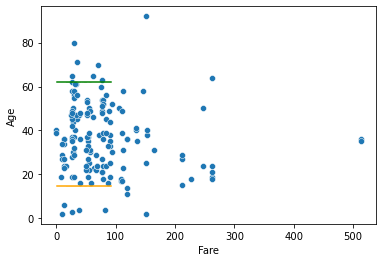

In [749]:
sns.scatterplot(x = df['Fare'], y = df['Age'])
sns.lineplot(x = df['Age'], y = pl, color = 'orange')
sns.lineplot(x = df['Age'], y = pu, color = 'green')

In [750]:
df['Age_OPA'] = np.where(df['Age']<pl,pl,np.where(df['Age']>pu,pu,df['Age']))

In [751]:
df[['Age', 'Age_OPA']].describe()

,Age,Age_OPA
count,158.000000,158.000000
mean,36.272152,36.272152
std,16.024920,14.110677
min,2.000000,14.850000
25%,24.000000,24.000000
50%,36.000000,36.000000
75%,48.000000,48.000000
max,92.000000,62.150000


In [752]:
df_sd_Age = df[(df['Age']>=pl) & (df['Age']<=pu)]
df_sd_Age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_IG_moda,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda,age_lm,SibSp_lm,Parch_lm,Fare_lm,Age_OPA
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,0.0,71.2833,71.2833,71.2833,C,38.0,1.0,0.0,71.2833,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,0.0,53.1000,53.1000,53.1000,S,35.0,1.0,0.0,53.1000,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,51.8625,51.8625,51.8625,S,54.0,0.0,0.0,51.8625,54.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.0,26.5500,26.5500,26.5500,S,58.0,0.0,0.0,26.5500,58.0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,...,0.0,13.0000,13.0000,13.0000,S,34.0,0.0,0.0,13.0000,34.0


##### SbSp

In [753]:
pl = np.nanpercentile(df['SibSp'],5)
pu = np.nanpercentile(df['SibSp'],95)

<AxesSubplot:xlabel='Fare', ylabel='SibSp'>

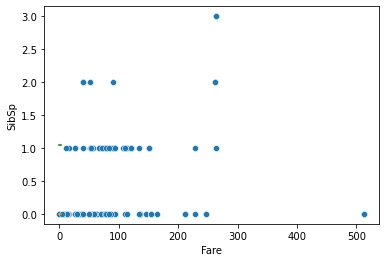

In [754]:
sns.scatterplot(x = df['Fare'], y = df['SibSp'])
sns.lineplot(x = df['SibSp'], y = pl, color = 'orange')
sns.lineplot(x = df['SibSp'], y = pu, color = 'green')

In [755]:
df['SibSp_OPA'] = np.where(df['SibSp']<pl,pl,np.where(df['SibSp']>pu,pu,df['SibSp']))

In [756]:
df[['SibSp', 'SibSp_OPA']].describe()

,SibSp,SibSp_OPA
count,180.000000,180.000000
mean,0.461111,0.396944
std,0.646122,0.493312
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,1.050000


In [757]:
df_sd_SibSp = df[(df['SibSp']>=pl) & (df['SibSp']<=pu)]
df_sd_SibSp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda,age_lm,SibSp_lm,Parch_lm,Fare_lm,Age_OPA,SibSp_OPA
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,71.2833,71.2833,71.2833,C,38.0,1.0,0.0,71.2833,38.0,1.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,53.1000,53.1000,53.1000,S,35.0,1.0,0.0,53.1000,35.0,1.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,51.8625,51.8625,51.8625,S,54.0,0.0,0.0,51.8625,54.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,16.7000,16.7000,16.7000,S,31.0,1.0,0.0,16.7000,NaN,1.0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,...,13.0000,13.0000,13.0000,S,34.0,0.0,0.0,13.0000,34.0,0.0


##### Parch

In [758]:
pl = np.nanpercentile(df['Parch'],5)
pu = np.nanpercentile(df['Parch'],95)

<AxesSubplot:xlabel='Fare', ylabel='Parch'>

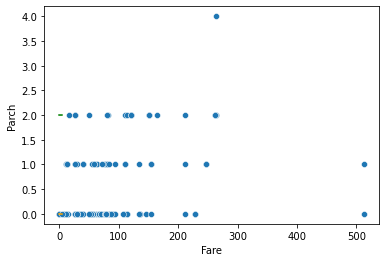

In [759]:
sns.scatterplot(x = df['Fare'], y = df['Parch'])
sns.lineplot(x = df['Parch'], y = pl, color = 'orange')
sns.lineplot(x = df['Parch'], y = pu, color = 'green')

In [760]:
df['Parch_OPA'] = np.where(df['Parch']<pl,pl,np.where(df['Parch']>pu,pu,df['Parch']))

In [761]:
df[['Parch', 'Parch_OPA']].describe()

,Parch,Parch_OPA
count,171.000000,171.000000
mean,0.461988,0.450292
std,0.753435,0.712607
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,4.000000,2.000000


In [762]:
df_sd_Parch = df[(df['Parch']>=pl) & (df['Parch']<=pu)]
df_sd_Parch.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_IG_mediana,Fare_IG_moda,Embarked_IG_moda,age_lm,SibSp_lm,Parch_lm,Fare_lm,Age_OPA,SibSp_OPA,Parch_OPA
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,71.2833,71.2833,C,38.0,1.0,0.0,71.2833,38.0,1.0,0.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,53.1000,53.1000,S,35.0,1.0,0.0,53.1000,35.0,1.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,51.8625,51.8625,S,54.0,0.0,0.0,51.8625,54.0,0.0,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,26.5500,26.5500,S,58.0,0.0,0.0,26.5500,58.0,NaN,0.0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,...,13.0000,13.0000,S,34.0,0.0,0.0,13.0000,34.0,0.0,0.0


##### Fare 

In [763]:
pl = np.nanpercentile(df['Fare'],5)
pu = np.nanpercentile(df['Fare'],95)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

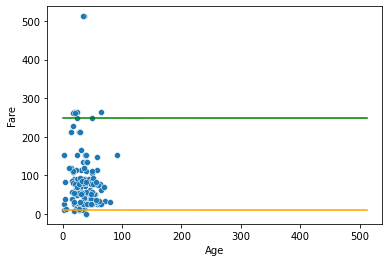

In [764]:
sns.scatterplot(x = df['Age'], y = df['Fare'])
sns.lineplot(x = df['Fare'], y = pl, color = 'orange')
sns.lineplot(x = df['Fare'], y = pu, color = 'green')

In [765]:
df['Fare_OPA'] = np.where(df['Fare']<pl,pl,np.where(df['Fare']>pu,pu,df['Fare']))

In [766]:
df[['Fare', 'Fare_OPA']].describe()

,Fare,Fare_OPA
count,175.000000,175.000000
mean,78.959191,75.607665
std,77.026328,62.250726
min,0.000000,10.500000
25%,29.700000,29.700000
50%,56.929200,56.929200
75%,90.539600,90.539600
max,512.329200,247.520800


In [767]:
df_sd_Fare = df[(df['Fare']>=pl) & (df['Fare']<=pu)]
df_sd_Fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_IG_moda,Embarked_IG_moda,age_lm,SibSp_lm,Parch_lm,Fare_lm,Age_OPA,SibSp_OPA,Parch_OPA,Fare_OPA
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,71.2833,C,38.0,1.0,0.0,71.2833,38.0,1.0,0.0,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,53.1000,S,35.0,1.0,0.0,53.1000,35.0,1.0,0.0,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,51.8625,S,54.0,0.0,0.0,51.8625,54.0,0.0,0.0,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,16.7000,S,31.0,1.0,0.0,16.7000,NaN,1.0,NaN,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,26.5500,S,58.0,0.0,0.0,26.5500,58.0,NaN,0.0,26.5500


### 5.	Al comparar los métodos del inciso 4 contra “titanic.csv”, ¿Qué método (para cada columna) se acerca más a la realidad y por qué? 

In [768]:
titanic = pd.read_csv("titanic.csv")

#### Sex

In [769]:

titanic = titanic.join(df[['Sex_IG']], on='PassengerId', how='outer')
titanic[['Sex', 'Sex_IG']].describe()

,Sex,Sex_IG
count,183,183
unique,2,2
top,male,male
freq,95,119


La imputación por la moda es la unica opción al ser una variable categórica. Sin embargo, al analizar la frecuencia real vs la imputada, se puede concluir que no es una mala opción, se acerca bastante al 95. Además, se mantiene a male como top, por lo que si existe un poco de sesgo, pero se minimizan lo más posible. 

#### Age

In [770]:
titanic = titanic.join(df[['Age_IG_media','Age_IG_mediana','Age_IG_moda','age_lm','Age_OPA']], on='PassengerId', how='outer')
titanic[['Age','Age_IG_media','Age_IG_mediana','Age_IG_moda','age_lm','Age_OPA']].describe()


,Age,Age_IG_media,Age_IG_mediana,Age_IG_moda,age_lm,Age_OPA
count,183.000000,183.000000,183.000000,183.000000,183.000000,158.000000
mean,35.674426,36.272152,36.234973,34.595628,35.551913,36.272152
std,15.643866,14.883669,14.883964,15.472073,14.994002,14.110677
min,0.920000,2.000000,2.000000,2.000000,2.000000,14.850000
25%,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
50%,36.000000,36.272152,36.000000,32.000000,32.000000,36.000000
75%,47.500000,47.000000,47.000000,47.000000,47.000000,48.000000
max,80.000000,92.000000,92.000000,92.000000,92.000000,62.150000


Considero que estan muy parejos el método de regresión lineal y la imputación por la moda. Sin embargo, tengo preferencia por el método de regresión linal ya que la media estamuy cercana a la real, y su desvición estándar no se aleja demasaido de la real. Esto me indica que sus distribuciones son muy parecidas. 

#### SibSp

In [771]:
titanic = titanic.join(df[['SibSp_IG_media','SibSp_IG_mediana','SibSp_IG_moda','SibSp_lm','SibSp_OPA']], on='PassengerId', how='outer')
titanic[['SibSp','SibSp_IG_media','SibSp_IG_mediana','SibSp_IG_moda','SibSp_lm','SibSp_OPA']].describe()

,SibSp,SibSp_IG_media,SibSp_IG_mediana,SibSp_IG_moda,SibSp_lm,SibSp_OPA
count,183.000000,183.000000,183.000000,183.000000,183.000000,180.000000
mean,0.464481,0.461111,0.453552,0.453552,0.453552,0.396944
std,0.644159,0.640775,0.643459,0.643459,0.643459,0.493312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,1.050000


Para esta variable considero que la mejor opción es la imputación por la media. Se puede observar que la media y la desviación estándar son muy parecedias a las reales, por lo que esto me indica que es el método que logró geenrar la distribución más parecida a la realidad. 

#### Parch

In [772]:
titanic = titanic.join(df[['Parch_IG_media','Parch_IG_mediana','Parch_IG_moda','Parch_lm','Parch_OPA']], on='PassengerId', how='outer')
titanic[['Parch','Parch_IG_media','Parch_IG_mediana','Parch_IG_moda','Parch_lm','Parch_OPA']].describe()

,Parch,Parch_IG_media,Parch_IG_mediana,Parch_IG_moda,Parch_lm,Parch_OPA
count,183.000000,183.000000,183.000000,183.000000,183.000000,171.000000
mean,0.475410,0.461988,0.431694,0.431694,0.431694,0.450292
std,0.754617,0.728173,0.737147,0.737147,0.737147,0.712607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000


Para esta variable se puede volver a evidenciar que la la imputación por la media es la opción más adecuada al ser la que se acerca más a la distribución real. Cabe mencionar que esto puede deberse a que Parch no tiene tantos valores nuéricos por lo que su rango es bastante limitado. En este caso, se puede observar que la regresión lineal también se acercó, pero probablemente es mejor la imputación por la media por lo que se mencionó anteriormente. 

#### Fare

In [773]:
titanic = titanic.join(df[['Fare_IG_media','Fare_IG_mediana','Fare_IG_moda','Fare_lm','Fare_OPA']], on='PassengerId', how='outer')
titanic[['Fare','Fare_IG_media','Fare_IG_mediana','Fare_IG_moda','Fare_lm','Fare_OPA']].describe()

,Fare,Fare_IG_media,Fare_IG_mediana,Fare_IG_moda,Fare_lm,Fare_OPA
count,183.000000,183.000000,183.000000,183.000000,183.000000,175.000000
mean,78.682469,78.959191,77.996131,76.668079,79.618135,75.607665
std,76.347843,75.314418,75.449730,76.077057,74.860398,62.250726
min,0.000000,0.000000,0.000000,0.000000,5.000000,10.500000
25%,29.700000,30.000000,30.000000,26.550000,30.000000,29.700000
50%,57.000000,61.175000,56.929200,55.441700,63.358300,56.929200
75%,90.000000,90.000000,90.000000,90.000000,90.000000,90.539600
max,512.329200,512.329200,512.329200,512.329200,512.329200,247.520800


En este caso es específico es sorprendente como se puede observar que la imputación por la mediana es la mejor opción. Definitivamente la media y desviación estándar estan muy cerca de la distribución real, pero la semejanza en los percentiles 25%,50% y 75% son los que mñas sorprenden en el análisis, ya que son los más cercanos a los reales para esta variable.

#### Embarked

In [774]:
titanic = titanic.join(df[['Embarked_IG_moda']], on='PassengerId', how='outer')
titanic[['Embarked', 'Embarked_IG_moda']].describe()

,Embarked,Embarked_IG_moda
count,183,183
unique,3,3
top,S,S
freq,116,122


La imputación por la moda es la unica opción al ser una variable categórica. Sin embargo, al analizar la frecuencia real vs la imputada, se puede concluir que no es una mala opción, se acerca bastante al 116. Además, se mantiene a el embarque por S como top, por lo que si existe un poco de sesgo, pero se minimizan lo más posible. 

### 6. Conclusiones

* El método de Filling values es valioso cuando existen datos o información adicional en los registros que permiten deducir la información faltante como en el caso de la variable de Sex.
* la imputación por la moda y la regresión logística son las únicas opciones de para corregir missing values cuando las variables son categóricas. Habrá que hacer un ejemplo con regresión logística para ver la diferencia en resultados con la imputación por la moda. 
* La imputación por la media es necesaria cuando se tienen variables numéricas, y es eficiente cuando el rango numérico no es tan amplio, como en el caso de SibSP Y Parch.
* El Percentile Approach no es una buena opción en mi opinión ya que de igual manera se deben eliminar los datos faltantes para cada columna, sin embargo, permie deshacerse de los outliers de una manera muy eficiente. Para esto, se pudo evidenciar que Percentile Approach es mucho más eficiente que el método de desviación estándar, ya que incluye los valores mínimos de la distribución. 
* Las tablas de .describe() son muy eficientes para poder analizar la semejanza de las distribuciones con los diferentes métodos, ya que se puede comparar la media y la desviación estándar de una manera eficente.
 

## Parte 2

### 1.	Luego del pre-procesamiento de la data con Missing Values, normalice las columnas numéricas por los métodos: 

Las variables numéricas que se tomaron en cuenta son Age, SibSp, Parch, Y Fare. Si bien Pclass es numérica al igual que survived, son variables categóricas en donde las categorias son números. Por eso no se toman en cuenta. 

#### a. Standarization

In [810]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

dfnew = df[["age_lm", "SibSp_IG_media","Parch_IG_media","Fare_IG_mediana"]]
dfnew.head()

,age_lm,SibSp_IG_media,Parch_IG_media,Fare_IG_mediana
0,38.0,1.000000,0.000000,71.2833
1,35.0,1.000000,0.000000,53.1000
2,54.0,0.000000,0.000000,51.8625
3,31.0,1.000000,0.461988,16.7000
4,58.0,0.461111,0.000000,26.5500


In [803]:
scaler = StandardScaler()
df_z = dfnew.copy()
for col in df_z.select_dtypes(include=['float64']).columns:
    df_z[col+'_z'] = scaler.fit_transform(df_z[[col]])

df_z.head()

,age_lm,SibSp_IG_media,Parch_IG_media,Fare_IG_mediana,age_lm_z,SibSp_IG_media_z,Parch_IG_media_z,Fare_IG_mediana_z
0,38.0,1.000000,0.000000,71.2833,0.163719,8.433032e-01,-6.361892e-01,-0.089215
1,35.0,1.000000,0.000000,53.1000,-0.036910,8.433032e-01,-6.361892e-01,-0.330875
2,54.0,0.000000,0.000000,51.8625,1.233740,-7.215893e-01,-6.361892e-01,-0.347322
3,31.0,1.000000,0.461988,16.7000,-0.304415,8.433032e-01,7.644262e-17,-0.814639
4,58.0,0.461111,0.000000,26.5500,1.501245,8.686898e-17,-6.361892e-01,-0.683730


In [804]:
df_z.describe()

,age_lm,SibSp_IG_media,Parch_IG_media,Fare_IG_mediana,age_lm_z,SibSp_IG_media_z,Parch_IG_media_z,Fare_IG_mediana_z
count,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,35.551913,0.461111,0.461988,77.996131,1.665335e-16,4.732098e-17,1.274026e-16,7.401487e-17
std,14.994002,0.640775,0.728173,75.449730,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,2.000000,0.000000,0.000000,0.000000,-2.243828e+00,-7.215893e-01,-6.361892e-01,-1.036586e+00
25%,25.000000,0.000000,0.000000,30.000000,-7.056730e-01,-7.215893e-01,-6.361892e-01,-6.378791e-01
50%,32.000000,0.000000,0.000000,56.929200,-2.375388e-01,-7.215893e-01,-6.361892e-01,-2.799841e-01
75%,47.000000,1.000000,1.000000,90.000000,7.656058e-01,8.433032e-01,7.408786e-01,1.595341e-01
max,92.000000,3.000000,4.000000,512.329200,3.775040e+00,3.973088e+00,4.872082e+00,5.772382e+00


#### b. MinMaxScaling

In [805]:
scaler = MinMaxScaler()
df_norm = dfnew.copy()
for col in df_norm.select_dtypes(include=['float64']).columns:
    df_norm[col+'_norm'] = scaler.fit_transform(df_norm[[col]])

df_norm.head()

,age_lm,SibSp_IG_media,Parch_IG_media,Fare_IG_mediana,age_lm_norm,SibSp_IG_media_norm,Parch_IG_media_norm,Fare_IG_mediana_norm
0,38.0,1.000000,0.000000,71.2833,0.400000,0.333333,0.000000,0.139136
1,35.0,1.000000,0.000000,53.1000,0.366667,0.333333,0.000000,0.103644
2,54.0,0.000000,0.000000,51.8625,0.577778,0.000000,0.000000,0.101229
3,31.0,1.000000,0.461988,16.7000,0.322222,0.333333,0.115497,0.032596
4,58.0,0.461111,0.000000,26.5500,0.622222,0.153704,0.000000,0.051822


In [806]:
df_norm.describe()

,age_lm,SibSp_IG_media,Parch_IG_media,Fare_IG_mediana,age_lm_norm,SibSp_IG_media_norm,Parch_IG_media_norm,Fare_IG_mediana_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,35.551913,0.461111,0.461988,77.996131,0.372799,0.153704,0.115497,0.152238
std,14.994002,0.640775,0.728173,75.449730,0.166600,0.213592,0.182043,0.147268
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,30.000000,0.255556,0.000000,0.000000,0.058556
50%,32.000000,0.000000,0.000000,56.929200,0.333333,0.000000,0.000000,0.111118
75%,47.000000,1.000000,1.000000,90.000000,0.500000,0.333333,0.250000,0.175668
max,92.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000


#### c. MaxAbsScaler

In [808]:
scaler = MaxAbsScaler()
df_max = dfnew.copy()
for col in df_max.select_dtypes(include=['float64']).columns:
    df_max[col+'_max'] = scaler.fit_transform(df_max[[col]])

df_max.head()

,age_lm,SibSp_IG_media,Parch_IG_media,Fare_IG_mediana,age_lm_max,SibSp_IG_media_max,Parch_IG_media_max,Fare_IG_mediana_max
0,38.0,1.000000,0.000000,71.2833,0.413043,0.333333,0.000000,0.139136
1,35.0,1.000000,0.000000,53.1000,0.380435,0.333333,0.000000,0.103644
2,54.0,0.000000,0.000000,51.8625,0.586957,0.000000,0.000000,0.101229
3,31.0,1.000000,0.461988,16.7000,0.336957,0.333333,0.115497,0.032596
4,58.0,0.461111,0.000000,26.5500,0.630435,0.153704,0.000000,0.051822


In [809]:
df_max.describe()

,age_lm,SibSp_IG_media,Parch_IG_media,Fare_IG_mediana,age_lm_max,SibSp_IG_media_max,Parch_IG_media_max,Fare_IG_mediana_max
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,35.551913,0.461111,0.461988,77.996131,0.386434,0.153704,0.115497,0.152238
std,14.994002,0.640775,0.728173,75.449730,0.162978,0.213592,0.182043,0.147268
min,2.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,30.000000,0.271739,0.000000,0.000000,0.058556
50%,32.000000,0.000000,0.000000,56.929200,0.347826,0.000000,0.000000,0.111118
75%,47.000000,1.000000,1.000000,90.000000,0.510870,0.333333,0.250000,0.175668
max,92.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000


### 2. Compare los estadísticos que considere más importantes para su conclusión y compare contra la data completa de “titanic.csv” (deberán de normalizar también). v

Se decidió normalizar los datos reales por el método de estandarización. Esto debido a que se considera que convitiéndolos todos a valores Z, se puede decidir despues diversos caminos a seguir para tratar los datos, al ser una forma mucho más general en el ámbito estadístico. 

Se comparo Age y Fare porque tienen un rango numérico mucho más amplio para poder brindar insigths importantes en este análisis.

In [834]:
#normlaización datos reales
titanic = pd.read_csv("titanic.csv")
titanic=titanic[["Age","SibSp","Parch","Fare"]]
scaler = StandardScaler()
titanic_z = titanic.copy()
for col in titanic_z.select_dtypes(include=['float64', 'int64']).columns:
    titanic_z[col+'_z'] = scaler.fit_transform(titanic_z[[col]])

titanic_z.head()

,Age,SibSp,Parch,Fare,Age_z,SibSp_z,Parch_z,Fare_z
0,38.0,1,0,71.2833,0.149065,0.833628,-0.631730,-0.097180
1,35.0,1,0,53.1000,-0.043230,0.833628,-0.631730,-0.335997
2,54.0,0,0,51.8625,1.174636,-0.723044,-0.631730,-0.352250
3,4.0,1,1,16.7000,-2.030273,0.833628,0.697081,-0.814070
4,58.0,0,0,26.5500,1.431029,-0.723044,-0.631730,-0.684702


#### Fare Real Normalizada vs  Fare completada Normalizada

##### Fare Real Normalizada 

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_z', ylabel='Density'>

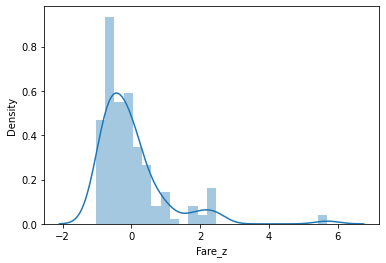

In [818]:
sns.distplot(titanic_z['Fare_z'])

##### Fare Completada Normalizada

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_IG_mediana_z', ylabel='Density'>

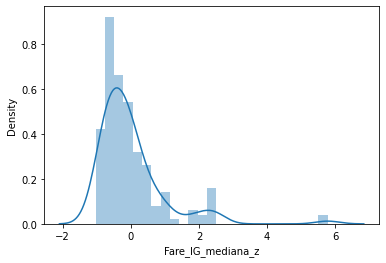

In [820]:
sns.distplot(df_z['Fare_IG_mediana_z'])

Para estas gráficas de la variable Fare, se quería comprobar la forma de la distribución luego de la normalización. Como se puede observar, el modelo de missing data, como la normalización por estandarización resultaron ser muy buenos modelos para la variable de Fare. Las distribuciones son casi idénticas.

##### Comprobación de efecto por normalizar con distribución normal (MinMaxScaling)

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_IG_mediana_norm', ylabel='Density'>

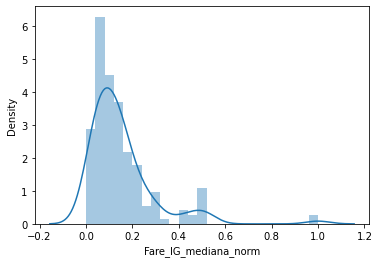

In [822]:
sns.distplot(df_norm['Fare_IG_mediana_norm'])

Para este ejemplo se quería demostrar que el método de normalización por MinMaxScaling es que la forma sigue siendo casi identica tanto con los datos reales como con la normalización por valores Z. El único cambio es que la distribución se desplaza y se acomoda en valores entre 0 y 1. 

#### Age Real Normalizada vs Age Completada Normalizada

###### Age Real Normalizada

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_z', ylabel='Density'>

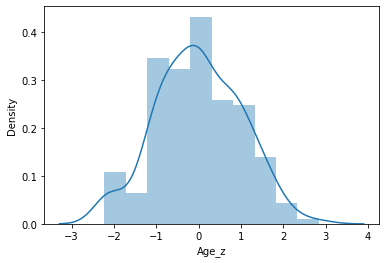

In [825]:
sns.distplot(titanic_z['Age_z'])

###### Age Completada Normalizada

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_lm_z', ylabel='Density'>

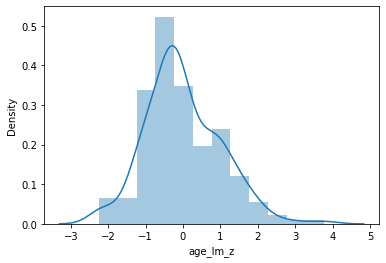

In [827]:
sns.distplot(df_z['age_lm_z'])

En el caso de la comparación con Age, se puede evidenciar pequeñas diferencias en la distribución que seguro fueron causadas por las pequeñas fallas en la regresión lineal. Sin embargo, se puede evidenciar que la normalización permite apreciar que ambas distribuciones son muy parecidas entre sí. A pesar de estos detalles se puede concluir que la normalización con valores Z resultó efectiva, y ya se pudo analizar con anterioridad que la regresión lineal era la mejor opción.

##### Comprobación de efecto por normalizar MaxAbsScaler

/Users/luispedro./opt/anaconda3/envs/basereal_sql/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_lm_max', ylabel='Density'>

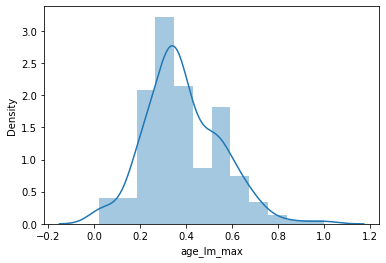

In [830]:
sns.distplot(df_max["age_lm_max"])

Como se puede apreciar en la forma de la distribución de Age normalizada por MaxAbsScaler, se puede concluir que realmente en este caso este método no era el más eficiente. Si bien se parece a la normalización estandarizada, se aleja un poco más de la forma de la distribución real que es lo que se está buscando. Se pueden notar muchas más diferencias en su forma. Esto se diferencia con la distribución normal que la forma se mantiene, a pesar que el rango numérico sea diferente como lo es en este caso también.   

##### Comparación Scatterplot con datos normalizados

<AxesSubplot:xlabel='age_lm_z', ylabel='Fare_IG_mediana_z'>

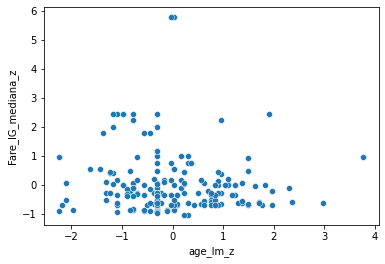

In [831]:
sns.scatterplot(x = df_z['age_lm_z'], y = df_z['Fare_IG_mediana_z'])

<AxesSubplot:xlabel='Age_z', ylabel='Fare_z'>

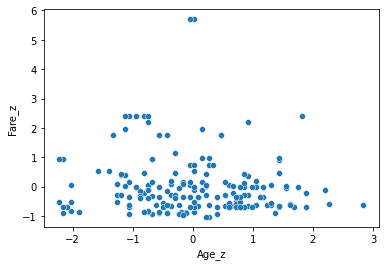

In [832]:
sns.scatterplot(x = titanic_z['Age_z'], y = titanic_z['Fare_z'])

Se puede observar en esta comparación de Fare contra Age en el scatter plot, que la distribución de registros es muy parecida. Se puede evidenciar una concentración de datos en el primer scatter plot y es debido a el método que se utilizó, haciendo imputación por la mediana. Sin embargo, las formas de ambas gráficas son muy parecids, por lo que tanto el método de imputación como la normalización por Standarization cumplieron su objetivo. 

#### Conclusiones Generales Parte 2

La normalización por Standarization es una opción bastante confiable para normalizar datos, y brinda posibilidad de conversión de los datos de acuerdo a la conveniencia del análisis. Por otro lado, se evidenció que el método de MinMaxScaling resulta tener la misma forma que el primero, pero en un rango de 0 a 1, por lo que es igual de efectivo. Para MaxAbsScaler si bien no es el mejor, de igual manera se obtuvieron resultados bastante adecuados para el objetivo de normalizar, sin embargo, se pudo ver que su distribución si cambia un poco con respecto a los datos reales. Por último, cabe mencionar que se re afirmó la correcta aplicación de los métodos de tratar missing values específicamente para Age y Fare, ya que se mantuvo una forma de distribución muy parecida en  la que la normalización facilitó su visualización en las gráficas anteriores.  